Basic Linear Regression

One Independent Variable (x), one dependent variable (y)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linreg(x,y):
    sumx = x.sum()
    sumy = y.sum()
    x2 = x*x
    sumx2 = x2.sum()
    xy = x*y
    sumxy = xy.sum()
    N = len(x)
    
    m = (N*sumxy-sumx*sumy)/(N*sumx2-sumx*sumx)
    b = (sumy*sumx2-sumx*sumxy)/(N*sumx2-sumx*sumx)
    
    return float(m),float(b)

def chi2(x,y,m,b):
    yfit = m*x+b
    chi2sum = 0.0
    for i in range(len(x)):
        chi2sum = chi2sum + (yfit[i]-y[i])**2
        
    return chi2sum

def ss_treatment(x,y):
    N = len(x)
    ybar = y.sum()/N
    ss_treat = 0.0
    for i in range(len(x)):
        ss_treat = ss_treat + (y[i]-ybar)**2
        
    return ss_treat

In [3]:
def do_fit(x,y):
    m,b = linreg(x,y)

    print('Fit Parameters: slope = %0.3f, intercept = %0.3f'% (m,b))

    yfit = m*x+b

    print ('Fit array: ', yfit)

    plt.plot(x,y,'b.')
    plt.plot(x,yfit,'r-')
    plt.xlim(0.0,5.0)
    plt.ylim(0.0,6.0)

    chi2val = chi2(x,y,m,b)

    print ('Chi^2 = %0.5f' % chi2val)

    print()

    ss_treatment_val = ss_treatment(x,y)
    ss_error = chi2val

    print ('SS_treatment = %0.5f' % ss_treatment_val)
    print ('SS_error = %0.5f' % ss_error)

    ss_total = ss_treatment_val + ss_error

    r2 = ss_treatment_val / ss_total

    print ('SS_total = %0.5f' % ss_total)
    print()
    print ('r^2 = %0.5f' % r2)
    print()

Fit Parameters: slope = 1.020, intercept = 0.975
Fit array:  [1.995 3.015 4.035 5.055]
Chi^2 = 0.05050

SS_treatment = 5.25250
SS_error = 0.05050
SS_total = 5.30300

r^2 = 0.99048



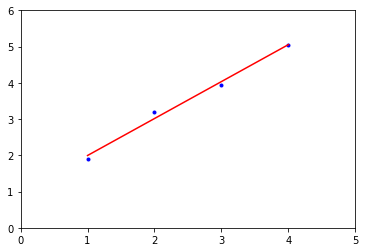

In [4]:
x = np.array([1.0,2.0,3.0,4.0])
y = np.array([1.90,3.20,3.95,5.05])

do_fit(x,y)

Fit Parameters: slope = 1.000, intercept = 1.000
Fit array:  [2. 3. 4. 5.]
Chi^2 = 0.00000

SS_treatment = 5.00000
SS_error = 0.00000
SS_total = 5.00000

r^2 = 1.00000



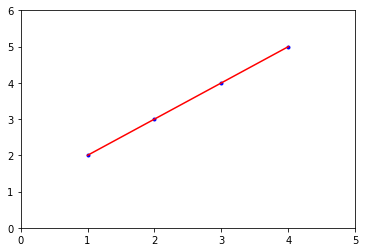

In [5]:
x = np.array([1.0,2.0,3.0,4.0])
y = np.array([2.00,3.00,4.00,5.00])

do_fit(x,y)

Fit Parameters: slope = 0.020, intercept = 0.975
Fit array:  [0.995 1.015 1.035 1.055]
Chi^2 = 0.05050

SS_treatment = 0.05250
SS_error = 0.05050
SS_total = 0.10300

r^2 = 0.50971



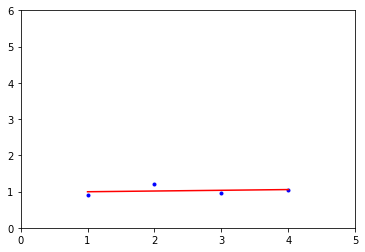

In [6]:
x = np.array([1.0,2.0,3.0,4.0])
y = np.array([0.90,1.20,0.95,1.05])

do_fit(x,y)

Fit Parameters: slope = 0.100, intercept = 0.775
Fit array:  [0.875 0.975 1.075 1.175]
Chi^2 = 0.00250

SS_treatment = 0.05250
SS_error = 0.00250
SS_total = 0.05500

r^2 = 0.95455



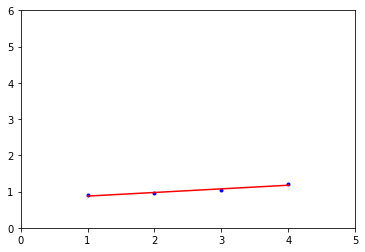

In [7]:
x = np.array([1.0,2.0,3.0,4.0])
y = np.array([0.90,0.95,1.05,1.20])

do_fit(x,y)

In [8]:
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [9]:
data_array = np.array([[1.0,1.90],[2.0,3.20],[3.0,3.95],[4.0,5.05]])
df = pd.DataFrame(data_array, columns = ['X','Y'])
df

,X,Y
0,1.0,1.90
1,2.0,3.20
2,3.0,3.95
3,4.0,5.05


In [10]:
result = sm.ols('Y ~ X',df,).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     206.0
Date:                Fri, 15 Oct 2021   Prob (F-statistic):            0.00482
Time:                        00:56:07   Log-Likelihood:                 3.0684
No. Observations:                   4   AIC:                            -2.137
Df Residuals:                       2   BIC:                            -3.364
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9750      0.195      5.010      0.0

/usr/local/lib64/python3.6/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [11]:
yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

0.9750000000000001 1.02 0.9903855306996668


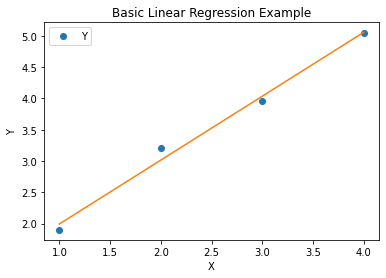

In [12]:
yfit = yint + slope*df['X']
x = df['X']

df.plot('X','Y',style='o')
plt.ylabel('Y')
plt.title('Basic Linear Regression Example')
plt.plot(x,yfit)
plt.show()

Coefficients (from curve_fit)
[0.96666666 1.025     ]
Covariance Matrix (from curve_fit)
[[ 0.11763889 -0.05041667]
 [-0.05041667  0.02520833]]


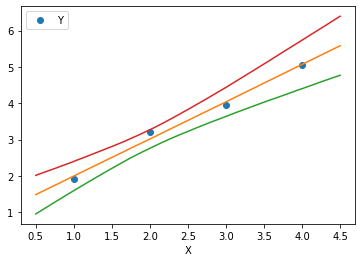

In [13]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = np.array(df['X'][:-1])
y = np.array(df['Y'][:-1])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(0.5,4.5,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

## Here is a bit of code to plot the sample data
#for i in range(10):
#    xmulti = []
#    ymulti = []
#    for j in range(100):
#        ymulti.append(ysample[j][i])
#        xmulti.append(xi[i])
#    xmulti = np.array(xmulti)
#    ymulti = np.array(ymulti)
#    plt.scatter(xmulti,ymulti)
# end of code snippet

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

df.plot('X','Y',style='o')
plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

Let us now create some data for a system with multiple variables.

In [14]:
url = 'http://www.statsci.org/data/general/uscrime.txt'
df = pd.read_csv(url,sep = '\t')
df.head(100)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
5,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682
6,12.7,1,11.1,8.2,7.9,0.519,98.2,4,13.9,0.097,3.8,6200,16.8,0.042100,20.6993,963
7,13.1,1,10.9,11.5,10.9,0.542,96.9,50,17.9,0.079,3.5,4720,20.6,0.040099,24.5988,1555
8,15.7,1,9.0,6.5,6.2,0.553,95.5,39,28.6,0.081,2.8,4210,23.9,0.071697,29.4001,856
9,14.0,0,11.8,7.1,6.8,0.632,102.9,7,1.5,0.100,2.4,5260,17.4,0.044498,19.5994,705


In [15]:
df.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


We will get to this later, but for the moment assume that we have determined, through some method, that 'Crime' depends most strongly on:

Po1, Wealth, Pop, Ed, and Prob

In [16]:
result = sm.ols('Crime ~ Po1 + Wealth + Pop + Ed + Prob',df).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     10.16
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           2.21e-06
Time:                        00:56:08   Log-Likelihood:                -327.26
No. Observations:                  47   AIC:                             666.5
Df Residuals:                      41   BIC:                             677.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    614.0542    492.286      1.247      0.2

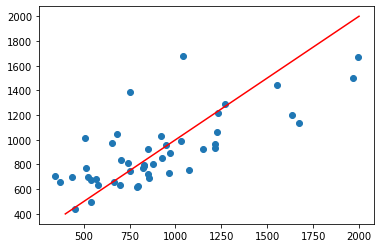

In [17]:
ypred = result.predict(df)
ydata = df['Crime']
plt.plot(ydata,ypred,'o')
xeqy_x = [400,2000]
xeqy_y = [400,2000]
plt.plot(xeqy_x,xeqy_y,'r-')

In [18]:
result_po1 = sm.ols('Crime ~ Po1',df,).fit()
print (result_po1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     40.36
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           9.34e-08
Time:                        00:56:08   Log-Likelihood:                -331.16
No. Observations:                  47   AIC:                             666.3
Df Residuals:                      45   BIC:                             670.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    144.4640    126.693      1.140      0.2

Coefficients (from curve_fit)
[145.57892301  89.61170176]
Covariance Matrix (from curve_fit)
[[16378.59941769 -1718.83674802]
 [-1718.83674802   202.47500655]]


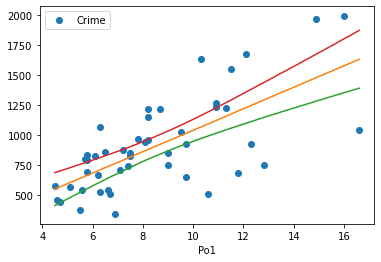

Correlation Coefficient^2 = 0.47280
Correlation Coefficient = 0.68760


In [19]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = np.array(df['Po1'][:-1])
y = np.array(df['Crime'][:-1])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

xi = np.linspace(np.min(x),np.max(x),100)
#xi = np.linspace(0.5,4.5,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

## Here is a bit of code to plot the sample data
#for i in range(10):
#    xmulti = []
#    ymulti = []
#    for j in range(100):
#        ymulti.append(ysample[j][i])
#        xmulti.append(xi[i])
#    xmulti = np.array(xmulti)
#    ymulti = np.array(ymulti)
#    plt.scatter(xmulti,ymulti)
# end of code snippet

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

df.plot('Po1','Crime',style='o')
plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

r2 = result_po1.rsquared
m = result.params[1]
print ("Correlation Coefficient^2 = %0.5f" % r2)

cc = np.sqrt(r2)
if (m<0):
    cc = -cc
    
print ("Correlation Coefficient = %0.5f" % cc)


In [20]:
result_prob = sm.ols('Crime ~ Prob',df,).fit()
print (result_prob.summary())

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     10.06
Date:                Fri, 15 Oct 2021   Prob (F-statistic):            0.00273
Time:                        00:56:09   Log-Likelihood:                -341.46
No. Observations:                  47   AIC:                             686.9
Df Residuals:                      45   BIC:                             690.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1247.4667    119.638     10.427      0.0

Coefficients (from curve_fit)
[ 1247.61529436 -7267.00042446]
Covariance Matrix (from curve_fit)
[[  14650.92807085 -252781.55670813]
 [-252781.55670813 5382082.49623858]]


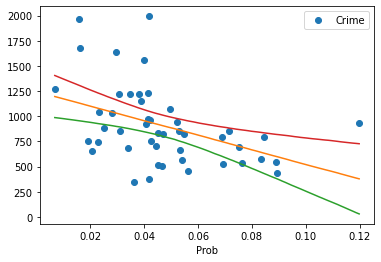

Correlation Coefficient^2 = 0.18269
Correlation Coefficient = -0.42742


In [21]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = np.array(df['Prob'][:-1])
y = np.array(df['Crime'][:-1])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

xi = np.linspace(np.min(x),np.max(x),100)
#xi = np.linspace(0.5,4.5,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

## Here is a bit of code to plot the sample data
#for i in range(10):
#    xmulti = []
#    ymulti = []
#    for j in range(100):
#        ymulti.append(ysample[j][i])
#        xmulti.append(xi[i])
#    xmulti = np.array(xmulti)
#    ymulti = np.array(ymulti)
#    plt.scatter(xmulti,ymulti)
# end of code snippet

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

df.plot('Prob','Crime',style='o')
plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

r2 = result_prob.rsquared
m = result_prob.params[1]
print ("Correlation Coefficient^2 = %0.5f" % r2)

cc = np.sqrt(r2)
if (m<0):
    cc = -cc
    
print ("Correlation Coefficient = %0.5f" % cc)


             PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
M       0.303712 -0.062804 -0.172420 -0.020355  0.358327  0.449133  0.157074   
So      0.330881  0.158372 -0.015543  0.292472  0.120611  0.100501 -0.196497   
Ed     -0.339621 -0.214612 -0.067740  0.079744  0.024428  0.008571  0.239436   
Po1    -0.308634  0.269818 -0.050646  0.333251  0.235277  0.095777 -0.080117   
Po2    -0.310993  0.263963 -0.053065  0.351928  0.204734  0.119525 -0.095183   
LF     -0.176178 -0.319430 -0.271530 -0.143265  0.394076 -0.504234  0.159316   
M.F    -0.116382 -0.394344  0.203162  0.010480  0.578774  0.074502 -0.155482   
Pop    -0.113078  0.467235 -0.077021 -0.032105  0.083170 -0.547099 -0.090462   
NW      0.293586  0.228011 -0.078816  0.239260  0.360794 -0.051220  0.311542   
U1     -0.040501 -0.008074  0.659029 -0.182791  0.131369 -0.017386  0.173541   
U2     -0.018122  0.279713  0.578501 -0.068893  0.134995 -0.048155  0.075268   
Wealth -0.379703  0.077189 -0.010065  0.

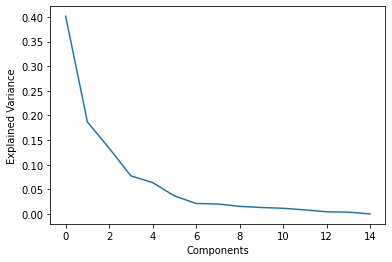

In [22]:
from sklearn.decomposition import PCA

df2 = df.drop(columns=['Crime'])

# You must normalize the data before applying the fit method
df_normalized=(df2 - df2.mean()) / df2.std()
pca = PCA(n_components=df2.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df2.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

             PC0       PC1       PC2       PC3       PC4
M       0.303712 -0.062804 -0.172420 -0.020355  0.358327
So      0.330881  0.158372 -0.015543  0.292472  0.120611
Ed     -0.339621 -0.214612 -0.067740  0.079744  0.024428
Po1    -0.308634  0.269818 -0.050646  0.333251  0.235277
Po2    -0.310993  0.263963 -0.053065  0.351928  0.204734
LF     -0.176178 -0.319430 -0.271530 -0.143265  0.394076
M.F    -0.116382 -0.394344  0.203162  0.010480  0.578774
Pop    -0.113078  0.467235 -0.077021 -0.032105  0.083170
NW      0.293586  0.228011 -0.078816  0.239260  0.360794
U1     -0.040501 -0.008074  0.659029 -0.182791  0.131369
U2     -0.018122  0.279713  0.578501 -0.068893  0.134995
Wealth -0.379703  0.077189 -0.010065  0.117818 -0.011677
Ineq    0.365798  0.027522  0.000294 -0.080666  0.216728
Prob    0.258887 -0.158317  0.117673  0.493034 -0.165628
Time    0.020629  0.380148 -0.223566 -0.540590  0.147648


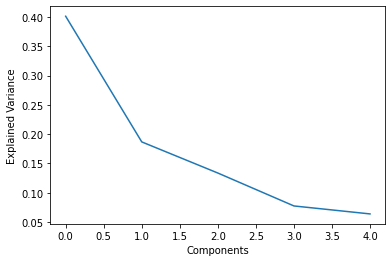

In [23]:
df2 = df.drop(columns=['Crime'])

# You must normalize the data before applying the fit method
df_normalized=(df2 - df2.mean()) / df2.std()
pca = PCA(n_components=5)
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(5)],
index=df2.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [24]:
print(np.array(pca.components_.T).shape)

(15, 5)


In [25]:
print (np.array(df2.values).shape)

(47, 15)


In [26]:
pc_array = np.matmul(np.array(df_normalized.values),np.array(pca.components_.T))
print (pc_array.shape)

(47, 5)


In [27]:
df3 = pd.DataFrame(pc_array, columns = ['PC1','PC2','PC3','PC4','PC5'])
df3['Crime'] = df['Crime']

In [28]:
df3

,PC1,PC2,PC3,PC4,PC5,Crime
0,4.199284,1.093831,1.119074,0.671781,-0.055283,791
1,-1.172663,-0.677014,0.052446,-0.083507,1.173200,1635
2,4.173725,-0.276775,0.371077,0.377940,-0.541345,578
3,-3.834962,2.576906,-0.227940,0.382623,1.644746,1969
4,-1.839300,-1.330986,-1.278828,0.718143,-0.041590,1234
5,-2.907234,0.330542,-0.532882,1.221406,-1.374361,682
6,-0.245775,0.073626,0.907421,1.136859,-0.718644,963
7,0.130133,1.359856,-0.597531,1.440454,0.222781,1555
8,3.610317,0.686210,-1.283722,0.551712,0.324293,856
9,-1.167238,-3.032070,-0.379845,-0.288870,0.646057,705


In [29]:
result3 = sm.ols('Crime ~ PC1 + PC2 + PC3 + PC4 + PC5',df3).fit()
print (result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     14.91
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           2.45e-08
Time:                        00:56:10   Log-Likelihood:                -321.85
No. Observations:                  47   AIC:                             655.7
Df Residuals:                      41   BIC:                             666.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    905.0851     35.594     25.428      0.0

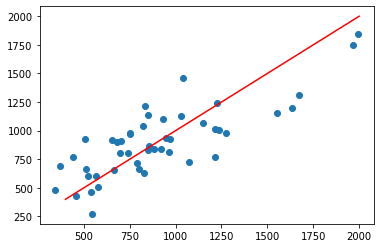

In [30]:
ypred = result3.predict(df3)
ydata = df3['Crime']
plt.plot(ydata,ypred,'o')
xeqy_x = [400,2000]
xeqy_y = [400,2000]
plt.plot(xeqy_x,xeqy_y,'r-')

In [41]:
result3 = sm.ols('Crime ~ PC5',df3).fit()
print (result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     22.78
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.95e-05
Time:                        01:00:33   Log-Likelihood:                -336.58
No. Observations:                  47   AIC:                             677.2
Df Residuals:                      45   BIC:                             680.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    905.0851     46.476     19.474      0.0

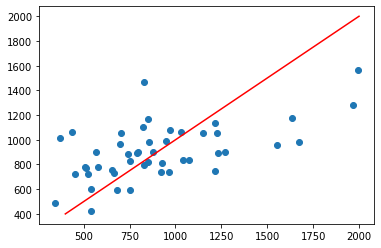

In [42]:
ypred = result3.predict(df3)
ydata = df3['Crime']
plt.plot(ydata,ypred,'o')
xeqy_x = [400,2000]
xeqy_y = [400,2000]
plt.plot(xeqy_x,xeqy_y,'r-')